                  date   HUFL   HULL   MUFL   MULL   LUFL   LULL         OT
0  2016-07-01 00:00:00  5.827  2.009  1.599  0.462  4.203  1.340  30.531000
1  2016-07-01 01:00:00  5.693  2.076  1.492  0.426  4.142  1.371  27.787001
2  2016-07-01 02:00:00  5.157  1.741  1.279  0.355  3.777  1.218  27.787001
3  2016-07-01 03:00:00  5.090  1.942  1.279  0.391  3.807  1.279  25.044001
4  2016-07-01 04:00:00  5.358  1.942  1.492  0.462  3.868  1.279  21.948000


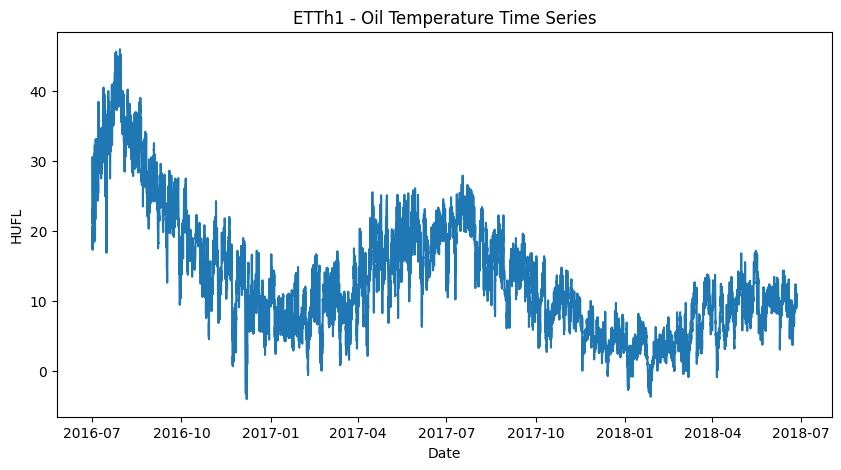

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("data/ETTh1.csv")
print(df.head())

df['date'] = pd.to_datetime(df['date'])

plt.figure(figsize = (10,5))
plt.plot(df['date'], df['OT'])

plt.xlabel("Date")
plt.ylabel("OT")
plt.title("ETTh1 - Oil Temperature Time Series")
plt.show()


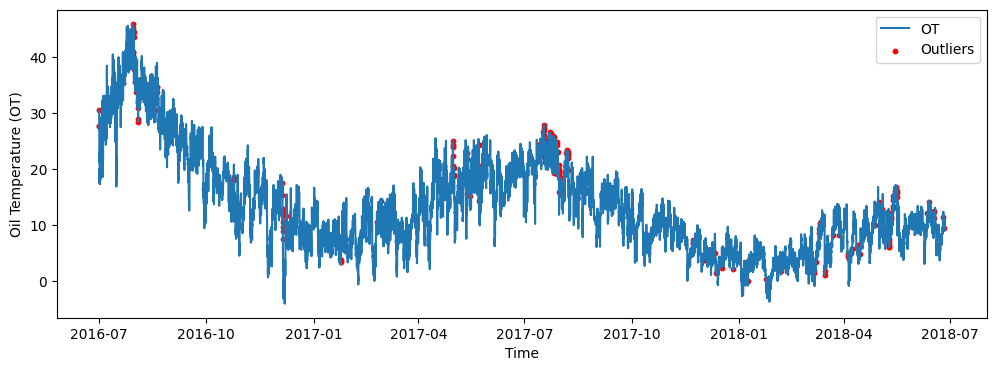

295


In [43]:
# Implementing KNN
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

df = pd.read_csv("data/ETTh1.csv")
df['date'] = pd.to_datetime(df['date'])

features = ['HUFL', 'MUFL', 'LUFL', 'OT']
X = df[features].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

nn = NearestNeighbors(n_neighbors=20)
nn.fit(X_scaled)

distances, _ = nn.kneighbors(X_scaled)

knn_score = distances.mean(axis=1)
df['knn_score'] = knn_score

threshold = knn_score.mean() + 3 * knn_score.std()
df['knn_outlier'] = knn_score > threshold

cnt = df['knn_outlier'].sum()

plt.figure(figsize=(12,4))
plt.plot(df['date'], df['OT'], label='OT')
plt.scatter(
    df.loc[df['knn_outlier'], 'date'],
    df.loc[df['knn_outlier'], 'OT'],
    color='red', s=10, label='Outliers'
)
plt.xlabel("Time")
plt.ylabel("Oil Temperature (OT)")
plt.legend()
plt.show()

print(cnt)
